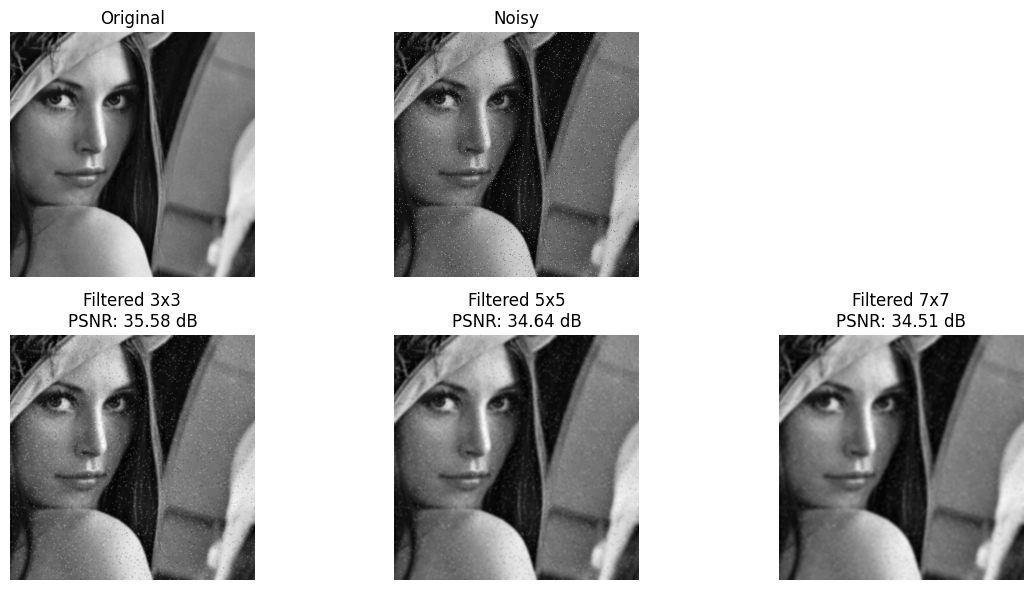

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Add salt and pepper noise
def add_noise(image, prob):
    noisy = image.copy()
    noisy[np.random.rand(*image.shape) < prob / 2] = 0  # Pepper
    noisy[np.random.rand(*image.shape) > 1 - prob / 2] = 255  # Salt
    return noisy

# Calculate PSNR
def psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    return float('inf') if mse == 0 else 20 * np.log10(255.0 / np.sqrt(mse))

# Load and process image
image = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))
noisy_image = add_noise(image, prob=0.02)

# Filter and calculate PSNR for different kernel sizes
kernel_sizes = [3, 5, 7]
filtered_images = [cv2.blur(noisy_image, (k, k)) for k in kernel_sizes]
psnr_values = [psnr(image, filtered) for filtered in filtered_images]

# Display images and PSNR values
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

# Display noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy')
plt.axis('off')

# Display filtered images with PSNR values
for i, (filtered, k) in enumerate(zip(filtered_images, kernel_sizes)):
    plt.subplot(2, 3, i + 4)
    plt.imshow(filtered, cmap='gray')
    plt.title(f'Filtered {k}x{k}\nPSNR: {psnr_values[i]:.2f} dB')
    plt.axis('off')

plt.tight_layout()
plt.show()
